In [1]:
import numpy as np
import pandas as pd
#import requests
import json
from datetime import datetime
import time
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [3]:
from sklearn.linear_model import LinearRegression


In [2]:
%store -r
#import the outside excel
puppies = pd.read_excel("puppies.xlsx", sheet_name="Sheet 1")
url = "https://data.objkt.com/v2/graphql"


In [3]:
len(puppies.token_pk)
#Metadata_2.to_excel('Metadata_2.xlsx')


10091

In [4]:
'['+','.join(f'"{item}"' for item in puppies['token_id'][:5]) + ']'

'["3","4","7","8","9"]'

#Collect the transfer history of Dogami, not trasaction history.

In [ ]:
#The current and previous holders address for tokens (discarded because the last record in holders history may not be the current holder)
""" data =pd.Series([])
for i in range(240):
    num = list(range(50*i+1,50*i+50+1))
    print(num)
    query = 'query MyQuery {\n  token(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, token_id: {_in:' + '['+ ','.join(f'"{item}"' for item in num) + ']'+'}}\n  ) {\n    display_uri\n    extra\n    flag\n    highest_offer\n    is_boolean_amount\n    last_listed\n    last_metadata_update\n    level\n    lowest_ask\n    name\n    ophash\n    supply\n    symbol\n    thumbnail_uri\n    timestamp\n    token_id\n    pk\n    holders {\n      holder_address\n    }\n  }\n}\n '
    time.sleep(0.4)
    r = requests.post(url, json={'query': query})
    print(r.status_code)
    json_data = json.loads(r.text)
    df_holder = pd.json_normalize(json_data['data'], record_path=['token', 'holders'], meta=[['token','token_id']])
    #put df into data
    data = pd.concat([data,df_holder]) """
    

In [ ]:
#The formal query loop
""" data = pd.Series([])
for i in range(909,1201):
    urlloop = f'https://api.tzkt.io/v1/tokens/transfers?token.contract=KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd&token.tokenId.lt={10*i+1}&token.tokenId.gt={10*i-10}&sort=timestamp&select=from.address,to.address,timestamp,id,token.tokenId'
    r= requests.get(url=urlloop)
    print(r.status_code, 10*i-10,10*i+1)
    json_data = json.loads(r.text)
    df = pd.json_normalize(json_data)
    data = pd.concat([data,df])
    time.sleep(2)
     """

In [43]:
#transfer=pd.concat([transfer,data])
#transfer['token.tokenId'] =pd.to_numeric(transfer['token.tokenId'])
#transfer[transfer['token.tokenId']>11900]

In [4]:
transfer.drop(columns=0, inplace=True)
transfer.describe()

,id,token.tokenId
count,6.103600e+04,61036.000000
mean,2.221917e+14,6526.046694
std,5.993059e+13,3557.861149
min,1.657915e+14,1.000000
25%,1.691925e+14,3388.000000
50%,2.213233e+14,6821.000000
75%,2.540389e+14,9732.000000
max,4.069909e+14,12000.000000


In [5]:
#%store transfer
transfer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61036 entries, 0 to 30
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   from.address   46126 non-null  object 
 1   to.address     61036 non-null  object 
 2   timestamp      61036 non-null  object 
 3   id             61036 non-null  float64
 4   token.tokenId  61036 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


In [6]:
transfer.index= range(len(transfer))

In [7]:
#Convert the timestamp
transfer['timestamp']=pd.to_datetime(transfer['timestamp'])

In [8]:
transfer[(transfer['token.tokenId']==4)]

,from.address,to.address,timestamp,id,token.tokenId
4,None,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,2022-02-22 22:11:20+00:00,1.657945e+14,4
14,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,2022-02-23 01:41:00+00:00,1.658692e+14,4
41,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1U1smALMSxtT5PdcWpFRPnFwCCaW6rjS8Z,2022-06-05 16:36:59+00:00,2.389305e+14,4
43,tz1U1smALMSxtT5PdcWpFRPnFwCCaW6rjS8Z,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,2022-11-13 15:19:44+00:00,3.783361e+14,4
44,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1U1smALMSxtT5PdcWpFRPnFwCCaW6rjS8Z,2022-11-14 11:16:14+00:00,3.791192e+14,4


In [59]:
#Exclude the duplicate transfer
print(Counter(transfer.duplicated()))
transfer = transfer.drop_duplicates()
transfer_after_mine = transfer[transfer['from.address'].apply(lambda x: x !=None)] #Exclude the None value

Counter({False: 50965})


In [4]:
transfer[transfer['token.tokenId']==2]

,0,from.address,to.address,timestamp,id,token.tokenId
0,NaN,None,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2022-02-22T22:01:20Z,1.657915e+14,2
15,NaN,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,2022-02-23T07:31:40Z,1.659701e+14,2


In [9]:
"""transfer['timediff_day'] =pd.Series([])
transfer['timediff_hour']=pd.Series([]) """

C:\Users\lzy20\AppData\Local\Temp\ipykernel_13812\427092502.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  transfer['timediff_day'] =pd.Series([])
C:\Users\lzy20\AppData\Local\Temp\ipykernel_13812\427092502.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  transfer['timediff_hour']=pd.Series([])


In [10]:
#Adding the a,b as copy to reduce the computation, if using original, there will be warning for every loop.
a = transfer['timediff_day'].copy()
b= transfer['timediff_hour'].copy()
for i in range(12000):
    temp = transfer['timestamp'][transfer['token.tokenId']==i+1].diff().astype('timedelta64[s]')
    a[temp.index] = temp
    temp = transfer['timestamp'][transfer['token.tokenId']==i+1].diff()
    b[temp.index] = temp
    #a = pd.concat([a,temp])
    
transfer['timediff_day']=b
transfer['timediff_second']=a 

In [57]:
#To see what happening in new label, use token #100 as an example
transfer[transfer['token.tokenId']==100]

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_second,timediff_hours
462,None,tz1VhCvo2M7ne6GihA46hqhEoPceFo1Kbhg5,2022-02-22 22:34:20+00:00,1.658020e+14,100,NaT,NaN,NaN
480,tz1VhCvo2M7ne6GihA46hqhEoPceFo1Kbhg5,tz1csAGXjPyid1jahsfb1Mo8BSECyor3cjxv,2022-03-11 03:50:14+00:00,1.730388e+14,100,16 days 05:15:54,1401354.0,389.3
491,tz1csAGXjPyid1jahsfb1Mo8BSECyor3cjxv,tz1ghJLuav1AQBZLaZCf77yRGtkZgtg2rCeo,2022-05-24 23:46:44+00:00,2.283758e+14,100,74 days 19:56:30,6465390.0,1796.0
494,tz1ghJLuav1AQBZLaZCf77yRGtkZgtg2rCeo,tz1VhCvo2M7ne6GihA46hqhEoPceFo1Kbhg5,2022-10-09 23:30:59+00:00,3.485358e+14,100,137 days 23:44:15,11922255.0,3311.8
495,tz1VhCvo2M7ne6GihA46hqhEoPceFo1Kbhg5,tz2GxrHvABCj9qMBqVoMkbEXggQ6TwUV4B6m,2022-11-29 03:12:44+00:00,3.922808e+14,100,50 days 03:41:45,4333305.0,1203.7
496,tz2GxrHvABCj9qMBqVoMkbEXggQ6TwUV4B6m,tz2Me2mSgJdmNJjRR8LFHWfNqxPAipuez2ng,2022-11-30 13:50:29+00:00,3.935610e+14,100,1 days 10:37:45,124665.0,34.7


In [77]:
print(Counter(a).most_common(10))
Counter(b).most_common(10)

[(0.0, 10836), (1.0, 1445), (2.0, 1307), (24.0, 647), (6.0, 601), (3.0, 582), (12.0, 495), (4.0, 476), (5.0, 435), (7.0, 331)]


[(NaT, 12000),
 (Timedelta('0 days 00:02:00'), 789),
 (Timedelta('0 days 00:01:00'), 743),
 (Timedelta('0 days 00:02:30'), 703),
 (Timedelta('0 days 00:01:30'), 659),
 (Timedelta('0 days 00:03:00'), 538),
 (Timedelta('0 days 00:03:30'), 429),
 (Timedelta('0 days 00:04:00'), 363),
 (Timedelta('0 days 00:04:30'), 264),
 (Timedelta('0 days 00:05:00'), 223)]

In [35]:
Counter(transfer['timediff_hours']).most_common(10)

[(0.1, 5624),
 (0.2, 1682),
 (0.3, 924),
 (0.4, 631),
 (2.1, 508),
 (0.5, 498),
 (0.6, 384),
 (24.1, 379),
 (0.7, 347),
 (0.8, 292)]

#The trading bot evidence

In [40]:
#These are the trading bots activities, 11 total
transfer[transfer['timediff_hours']<0.1]

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_second,timediff_hours
8783,tz1a43QD4oFRgKcyKShQoJtgi8hfLTzWBPXz,tz1TxJ6rTyymTQgSmMibArCusr7H2ANKXXro,2022-10-18 21:59:59+00:00,3.561502e+14,1977,0 days 00:00:00,0.0,0.0
20104,tz1hn8RbCwkwm4gfu89dkERyWtkVmVXo6Jv8,tz1TTYebPpNKDhqNvMJcZNY5WMQHU6Hqdotc,2022-04-27 18:21:59+00:00,2.043495e+14,4476,0 days 00:00:00,0.0,0.0
22593,tz1TymsrnsVmzEveXfHP5QJFqJpbU2XS1gmD,tz1TymsrnsVmzEveXfHP5QJFqJpbU2XS1gmD,2022-02-26 16:37:54+00:00,1.675980e+14,5095,0 days 00:00:00,0.0,0.0
37440,tz1a43QD4oFRgKcyKShQoJtgi8hfLTzWBPXz,tz1YLdhjKbVN97QS8XMCmKEh5gP8WmHb5TZU,2022-10-31 20:42:14+00:00,3.672192e+14,8155,0 days 00:00:00,0.0,0.0
38320,tz1ashQ2AzNxf569WXmXSwFb8YJ72J11h54C,tz1NoibU4oChiFUjH87X8KxKynVZqzyqqHSc,2022-06-23 19:06:14+00:00,2.551621e+14,8389,0 days 00:00:00,0.0,0.0
39779,tz1a43QD4oFRgKcyKShQoJtgi8hfLTzWBPXz,tz1fQ3Q5fwjXKMoeuSQNBHu1Hgik8oFaRshT,2022-10-09 14:13:44+00:00,3.481477e+14,8754,0 days 00:00:00,0.0,0.0
42381,tz1hn8RbCwkwm4gfu89dkERyWtkVmVXo6Jv8,tz1arCeUsJUHDNfkpsFt3XFocPNq21KyM2Sv,2022-07-20 18:57:44+00:00,2.776563e+14,9492,0 days 00:00:00,0.0,0.0
42685,tz1hn8RbCwkwm4gfu89dkERyWtkVmVXo6Jv8,tz1NTSq4spfrcRrzFXZvq9zeEpfPy2fXHJif,2022-07-25 22:03:29+00:00,2.822334e+14,9563,0 days 00:00:00,0.0,0.0
46830,tz1hn8RbCwkwm4gfu89dkERyWtkVmVXo6Jv8,tz1P5dgsYd7f9DvjiN4cpoZ3gPJVCQrNetBB,2022-08-03 07:00:59+00:00,2.897544e+14,10797,0 days 00:00:00,0.0,0.0
47766,tz1fH3TEaD18XP3XyNi6ugfjh64nnRMwufta,tz1SryBbJMUWYXGDFBjVvBe3Uwk3pBC1JXRH,2022-10-17 17:10:14+00:00,3.551407e+14,11068,0 days 00:00:00,0.0,0.0


In [27]:
1869+2794

4663

In [97]:
#I have checked those with 30 seconds holding, there little signs of trading bots. Those are interactiion with 'KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ' address or Objkt.com address.
transfer[(transfer['timediff_second']<60) & (transfer['from.address']!='KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ') & (transfer['to.address']!= 'KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ')].head(10)

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_second,timediff_hours
8783,tz1a43QD4oFRgKcyKShQoJtgi8hfLTzWBPXz,tz1TxJ6rTyymTQgSmMibArCusr7H2ANKXXro,2022-10-18 21:59:59+00:00,3.561502e+14,1977,0 days 00:00:00,0.0,0.0
11828,KT18p94vjkkHYY3nPmernmgVR7HdZFzE7NAk,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,2022-03-09 18:44:24+00:00,1.724692e+14,2647,0 days 00:00:30,30.0,0.1
20104,tz1hn8RbCwkwm4gfu89dkERyWtkVmVXo6Jv8,tz1TTYebPpNKDhqNvMJcZNY5WMQHU6Hqdotc,2022-04-27 18:21:59+00:00,2.043495e+14,4476,0 days 00:00:00,0.0,0.0
22593,tz1TymsrnsVmzEveXfHP5QJFqJpbU2XS1gmD,tz1TymsrnsVmzEveXfHP5QJFqJpbU2XS1gmD,2022-02-26 16:37:54+00:00,1.675980e+14,5095,0 days 00:00:00,0.0,0.0
26605,tz1h7A8vsYv1uyow3psem3gQ82BazQVqczQT,tz1YWz3twxdJKsAM1azkw5HwGTq43T2nhNSA,2022-02-26 00:47:44+00:00,1.673214e+14,6065,0 days 00:00:30,30.0,0.1
37440,tz1a43QD4oFRgKcyKShQoJtgi8hfLTzWBPXz,tz1YLdhjKbVN97QS8XMCmKEh5gP8WmHb5TZU,2022-10-31 20:42:14+00:00,3.672192e+14,8155,0 days 00:00:00,0.0,0.0
38320,tz1ashQ2AzNxf569WXmXSwFb8YJ72J11h54C,tz1NoibU4oChiFUjH87X8KxKynVZqzyqqHSc,2022-06-23 19:06:14+00:00,2.551621e+14,8389,0 days 00:00:00,0.0,0.0
38704,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1g5yND1NaPACVNNpSWqdjw8Lq3X8onVra7,2022-11-14 14:12:44+00:00,3.792553e+14,8483,0 days 00:00:30,30.0,0.1
39779,tz1a43QD4oFRgKcyKShQoJtgi8hfLTzWBPXz,tz1fQ3Q5fwjXKMoeuSQNBHu1Hgik8oFaRshT,2022-10-09 14:13:44+00:00,3.481477e+14,8754,0 days 00:00:00,0.0,0.0
42381,tz1hn8RbCwkwm4gfu89dkERyWtkVmVXo6Jv8,tz1arCeUsJUHDNfkpsFt3XFocPNq21KyM2Sv,2022-07-20 18:57:44+00:00,2.776563e+14,9492,0 days 00:00:00,0.0,0.0


In [54]:
#Suach as this token, they transfer with each other multiple times
transfer[transfer['token.tokenId']==2647].head()

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_second,timediff_hours
11801,None,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,2022-02-23 00:09:30+00:00,1.658396e+14,2647,NaT,NaN,NaN
11823,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ,2022-03-08 08:01:24+00:00,1.717881e+14,2647,13 days 07:51:54,1151514.0,319.9
11825,KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,2022-03-08 16:48:44+00:00,1.719517e+14,2647,0 days 08:47:20,31640.0,8.8
11827,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,KT18p94vjkkHYY3nPmernmgVR7HdZFzE7NAk,2022-03-09 18:43:54+00:00,1.724691e+14,2647,1 days 01:55:10,93310.0,26.0
11828,KT18p94vjkkHYY3nPmernmgVR7HdZFzE7NAk,tz1MU4bteTrhsYvfzqaKZAKcG2aisMAwQHb5,2022-03-09 18:44:24+00:00,1.724692e+14,2647,0 days 00:00:30,30.0,0.1


In [12]:
#transfer2 = transfer.copy()
#%store transfer2

Stored 'transfer2' (DataFrame)


In [3]:
transfer = transfer2.copy()

#Count the holder duration and the

In [4]:
Counter(transfer['timediff_second']<60)

Counter({False: 50785, True: 180})

In [5]:
#Second function
def seconds_hours(x):
    if np.isnan(x) ==True:
        return x
    else:
        return math.ceil(x/360)/10
transfer['timediff_hours']=transfer['timediff_second'].apply(lambda x:  seconds_hours(x))

Text(0.5, 0.98, 'How long the holder keep this NFT')

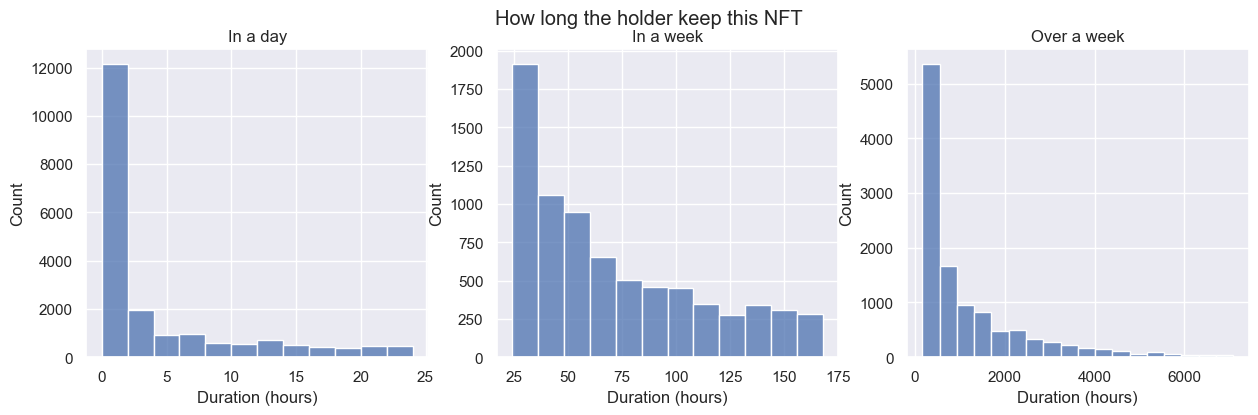

In [6]:
sns.set_theme()
fig,axes = plt.subplots(1, 3, figsize = (15,4))
sns.histplot(ax = axes[2], data = transfer['timediff_hours'][transfer['timediff_hours']>24*7],bins=18)
sns.histplot(ax = axes[1], data = transfer['timediff_hours'][(transfer['timediff_hours']<=24*7) & (transfer['timediff_hours']>24)],bins=12)
sns.histplot(ax = axes[0], data = transfer['timediff_hours'][transfer['timediff_hours']<=24],bins=12)
for i in range(3):
    axes[i].set(xlabel = 'Duration (hours)')
axes[0].set_title('In a day')
axes[1].set_title('In a week')
axes[2].set_title('Over a week')
fig.suptitle('How long the holder keep this NFT')

In [7]:

transfer['timestamp'][transfer['token.tokenId']==i].diff().astype('timedelta64[h]')

0     NaN
15    9.0
Name: timestamp, dtype: float64

In [8]:
transfer['from.address'].iloc[:4].astype('str')=='None'

0    True
1    True
2    True
3    True
Name: from.address, dtype: bool

In [9]:
#The first three are Offical addresses, they are market places not real transfer.
transfer_after_mine = transfer[(transfer['from.address'].astype('str') !='None') ]
OfficalAddress = ['KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ','KT18p94vjkkHYY3nPmernmgVR7HdZFzE7NAk','KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t']
activeFrom = pd.DataFrame(Counter(transfer_after_mine['from.address']).most_common(103))
activeTo = pd.DataFrame(Counter(transfer_after_mine['to.address']).most_common(103))

In [10]:
Counter(activeFrom[0].apply(lambda x: x in list(activeTo[0])))

Counter({True: 79, False: 24})

In [11]:
activeFrom.drop([0,1,2], inplace=True)
activeTo.drop([0,1,2], inplace=True)
activeFrom.columns =['address','times']
activeTo.columns =['address','times']

In [12]:
activeFrom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 3 to 102
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  100 non-null    object
 1   times    100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [13]:
active_address = activeFrom.merge(activeTo, how= 'outer', left_on= 'address', right_on='address')
active_address['times_x'][np.isnan(active_address['times_x'])] =0
active_address['times_y'][np.isnan(active_address['times_y'])] =0
active_address['times'] = active_address['times_x'] + active_address['times_y']
active_address = active_address.sort_values('times', ascending=False)

C:\Users\lzy20\AppData\Local\Temp\ipykernel_2808\4159835996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_address['times_x'][np.isnan(active_address['times_x'])] =0
C:\Users\lzy20\AppData\Local\Temp\ipykernel_2808\4159835996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_address['times_y'][np.isnan(active_address['times_y'])] =0


In [14]:
active_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   address  124 non-null    object 
 1   times_x  124 non-null    float64
 2   times_y  124 non-null    float64
 3   times    124 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


Text(0.5, 1.0, 'Active accounts')

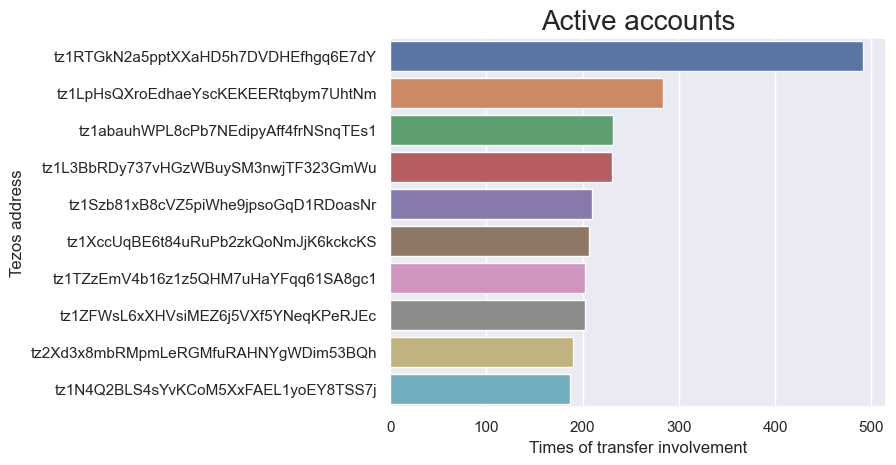

In [15]:
#Plot of active account
sns.set_theme()
a= sns.barplot(x = active_address['times'],y = active_address.iloc[:10]['address'],)
a.set(xlabel = 'Times of transfer involvement', ylabel = 'Tezos address')
a.set_title('Active accounts', fontsize = 20)

Process for holder stastics and My custom function in Python

In [16]:
def add_latest_record (df_tez, column_time, column_number, total_ID):
    last_record = pd.Series([])
    for i in range(total_ID):
        this_token = df_tez[df_tez[column_number]==i+1]
        this_record = this_token[this_token[column_time]==this_token[column_time].max()]
        last_record = pd.concat([last_record, this_record])
    last_record[column_number] = pd.to_numeric(last_record[column_number])
    last_record.drop(columns=0, inplace=True)
    return last_record

In [17]:
#Script of the function
""" last_transfer=pd.Series([])
for i in range(10):
    this_token = transfer[transfer['token.tokenId']==i+1]
    this_record = this_token[this_token['timestamp']==this_token['timestamp'].max()]
    last_transfer = pd.concat([last_transfer, this_record])
last_transfer['token.tokenId'] =pd.to_numeric(last_transfer['token.tokenId'])
last_transfer """


" last_transfer=pd.Series([])\nfor i in range(10):\n    this_token = transfer[transfer['token.tokenId']==i+1]\n    this_record = this_token[this_token['timestamp']==this_token['timestamp'].max()]\n    last_transfer = pd.concat([last_transfer, this_record])\nlast_transfer['token.tokenId'] =pd.to_numeric(last_transfer['token.tokenId'])\nlast_transfer "

In [18]:
last_transfer = add_latest_record(transfer, 'timestamp', 'token.tokenId',12000)

C:\Users\lzy20\AppData\Local\Temp\ipykernel_2808\3776841687.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_record = pd.Series([])


In [19]:
last_transfer.head()

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second,timediff_hours
42,tz2W1yCHVUZwr4PqzrWghRmhjtqu35WAu6Qi,tz2WogUVRTQb7PfgVdg3aXskDd54Uc18ch9n,2022-06-06 03:47:59+00:00,2.393686e+14,1.0,103 days 04:17:59,NaN,8914679.0,2476.3
15,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,2022-02-23 07:31:40+00:00,1.659701e+14,2.0,0 days 09:30:20,NaN,34220.0,9.6
36,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,2022-04-15 04:47:29+00:00,1.934969e+14,3.0,28 days 19:03:55,NaN,2487835.0,691.1
44,KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t,tz1U1smALMSxtT5PdcWpFRPnFwCCaW6rjS8Z,2022-11-14 11:16:14+00:00,3.791192e+14,4.0,0 days 19:56:30,NaN,71790.0,20.0
11,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,2022-02-22 22:55:20+00:00,1.658106e+14,5.0,0 days 00:44:00,NaN,2640.0,0.8


In [20]:
last_transfer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12004 entries, 42 to 61021
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   from.address     7863 non-null   object             
 1   to.address       12004 non-null  object             
 2   timestamp        12004 non-null  datetime64[ns, UTC]
 3   id               12004 non-null  float64            
 4   token.tokenId    12004 non-null  float64            
 5   timediff_day     7863 non-null   object             
 6   timediff_hour    0 non-null      float64            
 7   timediff_second  7863 non-null   float64            
 8   timediff_hours   7863 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(3)
memory usage: 937.8+ KB


In [21]:
Counter(last_transfer.duplicated())

Counter({False: 12004})

In [22]:
holder = last_transfer.drop_duplicates() #The first drop
holder = last_transfer.drop_duplicates(subset= ['timestamp', 'token.tokenId'], keep='last') #The second records of at the same second is the last holder

In [26]:
#Holder count
pd.DataFrame(holder['to.address'].unique())

,0
0,tz2WogUVRTQb7PfgVdg3aXskDd54Uc18ch9n
1,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ
2,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm
3,tz1U1smALMSxtT5PdcWpFRPnFwCCaW6rjS8Z
4,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR
...,...
4623,tz1NvGLtLNTWNYS8dYaLNusLdKyXFz4uMCo1
4624,tz1Ra7JBwFvR5ND2waer6mqGsDuwr7utzArc
4625,tz1bTCPXcufxUnR9nF4wAnjXsQakvguuAZ4T
4626,tz1NLqM94fKksS7YPYp41zbPtwKaRyh6qD1W


In [23]:
#The top holder
Top_holder = pd.DataFrame(Counter(holder['to.address']).most_common(10))
print(Top_holder)

                                      0    1
0  KT1HnV6WJFLksLaLZRLck1TX4SbbcTXULX9t  152
1  tz1T9XVQ8ZNV37f2tKZRjBLAg19TXLKyQprt  100
2  tz1NFiJUDasUpobcXVdtKyBj5eDcdmjnAPqt   69
3  tz1eraTmjeb1BK5XECtPHBE8AsW6gZESVssV   55
4  tz1hMuq6yxEzAeieUjBqXFCFTaLZf1eh3QkX   51
5  tz1SaUQAyjoyBkLZrVjQj2S7XdT3QR8K14JM   46
6  tz1R5D5zTCKw5NsQVgCSNp3jia82EVtxmGqf   45
7  KT1QcZ81mxhYutPCA7WeVAd7Ko1etWJBuRqQ   45
8  tz1g6z1t9yrDzH3W9e6VNn9WYZXXjUM3rkJg   44
9  tz1bngomFRHKF5ekLujozVN5WLCubCikU1xP   43


In [60]:
Top_holder.columns

RangeIndex(start=0, stop=2, step=1)

Text(0.5, 1.0, 'Top Dogami holders on 12/16')

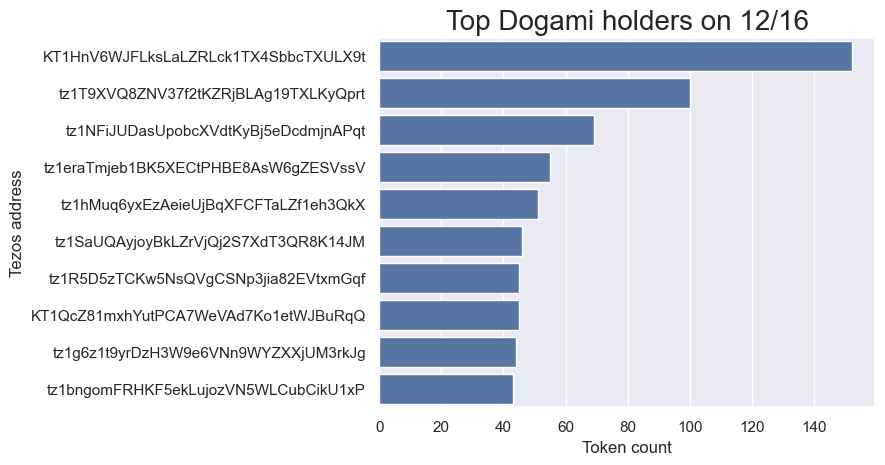

In [25]:
sns.set_style('darkgrid')
sns.set(font_scale=1)
a = sns.barplot(x=1, y=0, data=Top_holder ,color="b")
a.set(xlabel= "Token count", ylabel = "Tezos address")
a.set_title( 'Top Dogami holders on 12/16', fontsize = 20)

A record is missing from data collection, need to check if it is due to API fault or my data manipulation.

In [82]:
holder[holder['to.address']=='tz1hWTVS3RJEVxfxJAwLXxWLqd6rBMFUMLSK']

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second
17594,tz1XybkRZWjLx3hwcy1hQ7PT6FWEhpHm1FBv,tz1hWTVS3RJEVxfxJAwLXxWLqd6rBMFUMLSK,2022-04-22 11:13:44+00:00,1.998894e+14,3917.0,57 days 21:38:04,NaN,5002684.0


In [83]:
#This is the token missing the last transfer record. The original can be checked in https://tzkt.io/KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd/tokens/3917/transfers
transfer[transfer['token.tokenId']==3917] 

,from.address,to.address,timestamp,id,token.tokenId,timediff_day,timediff_hour,timediff_second
17549,None,tz1euTUPRdMQs88gCPYhpVJKjQvbYXJXSf3d,2022-02-23 03:46:00+00:00,1.659067e+14,3917,NaT,NaN,NaN
17557,tz1euTUPRdMQs88gCPYhpVJKjQvbYXJXSf3d,tz1XybkRZWjLx3hwcy1hQ7PT6FWEhpHm1FBv,2022-02-23 13:35:40+00:00,1.660920e+14,3917,0 days 09:49:40,NaN,35380.0
17594,tz1XybkRZWjLx3hwcy1hQ7PT6FWEhpHm1FBv,tz1hWTVS3RJEVxfxJAwLXxWLqd6rBMFUMLSK,2022-04-22 11:13:44+00:00,1.998894e+14,3917,57 days 21:38:04,NaN,5002684.0


#Collect and process the transaction info of Dogami

In [5]:
#The trading info of the dogami puppies, the first part (finished code)
""" data =pd.Series([])
for i in range(201):
    num = list(range(50*i,50*i+50))
    print(num)
    query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: '+'['+','.join(f'"{item}"' for item in num) + ']'+'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'
    r = requests.post(url, json={'query': query})
    time.sleep(0.2)
    print(r.status_code)
    json_data = json.loads(r.text)
    df = pd.json_normalize(json_data, record_path=['data','event'])
    #put df into data
    data = pd.concat([data,df]) """



' data =pd.Series([])\nfor i in range(201):\n    num = list(range(50*i,50*i+50))\n    print(num)\n    query = \'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: \'+\'[\'+\'´,\'.join(f\'"{item}"\' for item in num) + \']\'+\'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n\'\n    r = requests.post(url, json={\'query\': query})\n    time.sleep(0.2)\n    print(r.status_code)\n    json_data = json.loads(r.text)\n    df = pd.json_normalize(json_data, record_path=[\'data\',\'event\'])\n    #put df into data\n    data = pd.concat([data,df])\n '

In [6]:
#Add the trading info ofthe Dogami not included in the loop (finished code)
""" data1 =pd.Series([])
num = list(range(10050,10092))
query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: '+'['+','.join(f'"{item}"' for item in num) + ']'+'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'
r = requests.post(url, json={'query': query})
time.sleep(0.2)
print(r.status_code)
json_data = json.loads(r.text)
df = pd.json_normalize(json_data, record_path=['data','event'])
data1 = pd.concat([data1,df])
#put df into data """


' data1 =pd.Series([])\nnum = list(range(10050,10092))\nquery = \'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: \'+\'[\'+\',\'.join(f\'"{item}"\' for item in num) + \']\'+\'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n\'\nr = requests.post(url, json={\'query\': query})\ntime.sleep(0.2)\nprint(r.status_code)\njson_data = json.loads(r.text)\ndf = pd.json_normalize(json_data, record_path=[\'data\',\'event\'])\ndata1 = pd.concat([data1,df])\n#put df into data '

In [7]:
#Ptrade = pd.concat([data,data1]) #Merge two query's data

In [8]:
#Ptrade = pd.DataFrame(data)
#Ptrade.to_excel("Ptrade.xlsx")

In [66]:
#Ptrade.drop(columns=0, inplace=True)

In [84]:
#Process the dataframe
Ptrade['ts_new']=Ptrade['timestamp'].astype('str').apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S+00:00"))
Ptrade['Week']= Ptrade['ts_new'].dt.week #create a week column
Ptrade['month']= Ptrade['ts_new'].dt.month
Ptrade['token.token_id'] = pd.to_numeric(Ptrade['token.token_id']) #Change format to int64

C:\Users\lzy20\AppData\Local\Temp\ipykernel_5668\2293408133.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Ptrade['Week']= Ptrade['ts_new'].dt.week #create a week column


In [85]:
Ptrade = Ptrade.merge(Metadata_2[['token_id', 'last_metadata_update']], how ='left', left_on='token.token_id', right_on='token_id') #Merge the columns to get last metadata update
Ptrade.drop('token_id',axis=1,inplace= True)

In [30]:
#Unused sector because the column 'last_metadata_date' is not needed anamore
#The foris different in datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
#Ptrade['last_metadata_dateformat']=Ptrade['last_metadata_update'].astype('str').apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))
#Ptrade['last_metadata_date']= Ptrade['last_metadata_dateformat'].dt.date

In [86]:
#Add Birthday column from another table
Ptrade = Ptrade.merge(puppies[['token_id','Birthday','Rarity tier','Rarity score']], left_on= 'token.token_id', right_on='token_id')
puppies.head()

,token_id,token_pk,Birthday,Bonding level,Breed,Breeding count,Eyes color,Friendliness,Fur color,Gender,...,Rarity tier,Secondary personality,Size,Status,Strength,Vitality,Rarity tier_Bronze,Rarity tier_Diamond,Rarity tier_Gold,Rarity tier_Silver
0,3,10306,2022-04-15,1,Golden Retriever,0,Black #5,12,Cream #5,Male,...,Diamond,Gentle,Medium male,Puppy,3,5,0,1,0,0
1,4,10691,2022-03-05,1,Labrador,0,Brown #5,8,Black #11,Male,...,Diamond,Charming,Small male,Puppy,6,3,0,1,0,0
2,7,10962,2022-03-04,1,Husky,0,Brown #3,3,Black & white #11,Female,...,Bronze,Devoted,Small female,Puppy,5,5,1,0,0,0
3,8,11530,2022-03-08,1,Toy Poodle,0,Grey #5,3,Apricot #6,Female,...,Bronze,Jolly,Medium female,Puppy,10,6,1,0,0,0
4,9,11383,2022-03-06,1,Husky,0,Green #5,3,Chocolate & white #2,Male,...,Bronze,Gentle,Medium male,Puppy,8,8,1,0,0,0


In [32]:
Ptrade.head()

,0,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month,last_metadata_update,token_id,Birthday,Rarity tier,Rarity score
0,NaN,31553847.0,ask_purchase,250000000.0,2022-08-11T09:04:29+00:00,23684.0,tz2XYjjBvQmHNankGRSdNsKdFbQ1kEjQJrrb,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,48,2022-08-11 09:04:29,32,8,2022-07-06T17:32:14,48,2022-03-06,Silver,4751.24
1,NaN,31600098.0,ask_purchase,270000000.0,2022-08-12T16:06:44+00:00,23535.0,tz1RhD4eJNjD52VYfe94JNVhNT6yTXFZ1PLe,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,49,2022-08-12 16:06:44,32,8,2022-07-06T17:34:44,49,2022-03-06,Silver,6364.02
2,NaN,2815223.0,conclude_auction,NaN,2022-02-28T07:48:34+00:00,10306.0,None,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,3,2022-02-28 07:48:34,9,2,2022-07-06T18:49:29,3,2022-04-15,Diamond,9115.57
3,NaN,2856235.0,conclude_auction,NaN,2022-02-28T19:53:14+00:00,10306.0,None,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,3,2022-02-28 19:53:14,9,2,2022-07-06T18:49:29,3,2022-04-15,Diamond,9115.57
4,NaN,2893297.0,conclude_auction,NaN,2022-03-01T09:14:34+00:00,10306.0,None,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,3,2022-03-01 09:14:34,9,3,2022-07-06T18:49:29,3,2022-04-15,Diamond,9115.57


In [87]:
#exclude the price = NaN record, they are unsold auctions 
Ptrade = Ptrade[Ptrade['price'].astype('str')!='nan']

In [34]:
Ptrade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4337 entries, 0 to 5684
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   0                     0 non-null      float64       
 1   id                    4337 non-null   float64       
 2   event_type            4337 non-null   object        
 3   price                 4337 non-null   float64       
 4   timestamp             4337 non-null   object        
 5   token_pk              4337 non-null   float64       
 6   recipient_address     4337 non-null   object        
 7   creator_address       4337 non-null   object        
 8   token.token_id        4337 non-null   int64         
 9   ts_new                4337 non-null   datetime64[ns]
 10  Week                  4337 non-null   int64         
 11  month                 4337 non-null   int64         
 12  last_metadata_update  4337 non-null   object        
 13  token_id          

In [88]:
Ptrade[Ptrade['ts_new']<Ptrade['Birthday']].head(10) #These are the trades when puppies were boxes

,0,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month,last_metadata_update,token_id,Birthday,Rarity tier,Rarity score
5,NaN,22437837.0,ask_purchase,6.660000e+08,2022-02-22T22:27:50+00:00,10306.0,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,3,2022-02-22 22:27:50,8,2,2022-07-06T18:49:29,3,2022-04-15,Diamond,9115.57
18,NaN,22442927.0,accept_offer,4.000000e+08,2022-02-22T22:48:50+00:00,13023.0,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,tz1asdA3hubZm543qdD4SsV4hH6KhPG8r4bj,17,2022-02-22 22:48:50,8,2,2022-07-06T17:34:14,17,2022-03-06,Bronze,5579.70
19,NaN,22627121.0,ask_purchase,5.000000e+08,2022-02-23T15:53:10+00:00,13023.0,tz1QFpBctBDgmFZ7dxG4ZtLPkM2DhoNZSNea,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,17,2022-02-23 15:53:10,8,2,2022-07-06T17:34:14,17,2022-03-06,Bronze,5579.70
20,NaN,22448027.0,ask_purchase,4.000000e+08,2022-02-22T23:01:20+00:00,11897.0,tz1RzSXgXfsZW7oiT3vfAYnAW2TuzxcqL5uy,tz1aqJjtx4ZAJsuVTwXhzmZanY5WYd7CCrHJ,10,2022-02-22 23:01:20,8,2,2022-07-06T16:59:59,10,2022-03-04,Bronze,4999.77
22,NaN,22490512.0,ask_purchase,1.200000e+09,2022-02-23T01:41:00+00:00,10691.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,4,2022-02-23 01:41:00,8,2,2022-07-06T17:02:59,4,2022-03-05,Diamond,8709.46
23,NaN,22599135.0,ask_purchase,4.600000e+08,2022-02-23T13:19:10+00:00,12747.0,tz1Vj3y6sAtDVPZ25XHjCiNnxZZ3SZcPyuHc,tz1cp312oRvwp5honfR55EsWUF1nA7QZYxT7,16,2022-02-23 13:19:10,8,2,2022-07-06T16:28:59,16,2022-03-04,Silver,4855.71
24,NaN,22904152.0,ask_purchase,9.500000e+08,2022-02-24T21:38:00+00:00,14030.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1cp312oRvwp5honfR55EsWUF1nA7QZYxT7,23,2022-02-24 21:38:00,8,2,2022-07-06T16:56:59,23,2022-03-04,Silver,5631.25
25,NaN,23948222.0,ask_purchase,5.000000e+08,2022-03-02T18:08:04+00:00,12221.0,tz1dEZ79EzpxbaVfFqiDwFzjM4ZCQqsdLQ1x,tz1XA1jR6WjMen73zcc9nRfKyCWV6CUdoeVq,12,2022-03-02 18:08:04,9,3,2022-07-06T16:27:29,12,2022-03-04,Gold,8191.82
26,NaN,24095979.0,ask_purchase,5.000000e+08,2022-03-03T21:22:04+00:00,17264.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz2SdXypEiAy63fDy2K5xhtvnxhyvTXDTH2Q,36,2022-03-03 21:22:04,9,3,2022-07-06T16:57:59,36,2022-03-04,Silver,5488.97
27,NaN,24160724.0,ask_purchase,5.000000e+08,2022-03-04T12:28:14+00:00,12075.0,tz1Q8j5J5VmPNpXXa2Wike5RwjUgpqYrf9LG,tz1XA1jR6WjMen73zcc9nRfKyCWV6CUdoeVq,13,2022-03-04 12:28:14,9,3,2022-07-06T18:58:59,13,2022-05-17,Bronze,3420.91


Pick the boxes from 12000 tokensThis section is not related to previous code but used in to following section)

In [68]:
#[i in range(1,10) for i in puppies['token_id'][:10]] # so weird, when I use this statement, it gives me all true value
a = [len(puppies[puppies['token_id'] == i+1]) ==0 for i in range(12000)] #Get a Boolean list
box=[]
for i in range(12000):
    if a[i]:
        box.extend([i+1])

In [37]:
[i in puppies['token_id'] for i in range(10)] #Indeed token ID do not include 0,1,2

[True, True, True, True, True, True, True, True, True, True]

In [42]:
#Test the box loop
for i in range(5):
    print(box[10*i:10*i+10])

[1, 2, 5, 6, 18, 20, 30, 34, 46, 47]
[60, 61, 68, 69, 74, 77, 78, 89, 90, 91]
[101, 123, 152, 162, 167, 182, 191, 192, 204, 205]
[215, 216, 228, 234, 235, 238, 242, 245, 284, 285]
[315, 317, 330, 331, 333, 342, 343, 361, 362, 375]


In [ ]:
#Get Box trade info ( the offical query)
""" data =pd.Series([])
for i in range(190):
    num = box[10*i:10*i+10]
    print(num)
    query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: '+'['+','.join(f'"{item}"' for item in num) + ']'+'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'
    r = requests.post(url, json={'query': query})
    time.sleep(0.5)
    print(r.status_code)
    json_data = json.loads(r.text)
    df = pd.json_normalize(json_data, record_path=['data','event'])
    #put df into data
    data = pd.concat([data,df]) """

In [40]:
#box = data

In [89]:
#Process the dataframe
box['ts_new']=box['timestamp'].astype('str').apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S+00:00"))
box['Week']= box['ts_new'].dt.week
box['month']=box['ts_new'].dt.month
box['token.token_id'] = pd.to_numeric(box['token.token_id'])
box.merge(Metadata_2[['token_id', 'last_metadata_update']], how ='left', left_on='token.token_id', right_on='token_id') #Add a column from another table
#box.drop(columns=0, inplace=True) #Drop one unnecessary column

C:\Users\lzy20\AppData\Local\Temp\ipykernel_5668\2533511416.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  box['Week']= box['ts_new'].dt.week


,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month,token_id,last_metadata_update
0,22444186.0,ask_purchase,4.990000e+08,2022-02-22T22:55:20+00:00,10517.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,5,2022-02-22 22:55:20,8,2,5,2022-03-03T15:02:54
1,22440368.0,ask_purchase,4.490000e+08,2022-02-22T22:34:50+00:00,12893.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1asdA3hubZm543qdD4SsV4hH6KhPG8r4bj,18,2022-02-22 22:34:50,8,2,18,2022-03-03T15:02:54
2,22451419.0,ask_purchase,1.499000e+09,2022-02-22T23:30:00+00:00,10078.0,tz2W1yCHVUZwr4PqzrWghRmhjtqu35WAu6Qi,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,1,2022-02-22 23:30:00,8,2,1,2022-03-03T15:02:54
3,22545981.0,ask_purchase,1.299000e+09,2022-02-23T07:31:40+00:00,9889.0,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2,2022-02-23 07:31:40,8,2,2,2022-03-03T15:02:54
4,2613534.0,conclude_auction,4.440000e+08,2022-02-23T22:47:10+00:00,37715.0,tz1YPg4d413dPtKad1mSauUafMFN5qM63MRr,tz1RtusLoe5SXzArZLEWSyjR12e9RsayRvDk,74,2022-02-23 22:47:10,8,2,74,2022-03-03T15:02:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,29423723.0,accept_offer_floor,2.400000e+08,2022-06-02T23:34:59+00:00,3631584.0,tz1beSgPmcxe9jQdMVWLH3hmmocBLwsooBZv,tz1eLAQ89wh7ULyER5Lc2cJ5kFhPCB7t3Pso,11707,2022-06-02 23:34:59,22,6,11707,2022-06-02T23:08:14
322,29448590.0,ask_purchase,2.600000e+08,2022-06-03T13:15:14+00:00,3633599.0,tz1f8TpFebYEkdiB8KTjdVmwjppRXD8aa6HY,tz1SvpAbG3jWjNVC1VmAYGbXYu58KqrJHxeD,11730,2022-06-03 13:15:14,22,6,11730,2022-06-03T00:53:44
323,29814690.0,ask_purchase,3.300000e+08,2022-06-12T08:08:14+00:00,3641689.0,tz1UKmqEn9W2A5qcfBBYeEUYQ4hYz8mUuT1i,tz1a2kfkkWNGoX6Jxt3rWhGVQu5wkHcSyBgA,11808,2022-06-12 08:08:14,23,6,11808,2022-06-03T06:09:29
324,29445404.0,accept_offer_floor,2.225010e+08,2022-06-03T11:43:59+00:00,3648909.0,tz1Szb81xB8cVZ5piWhe9jpsoGqD1RDoasNr,tz1aYFgPBH88c6MdoJnR8CPc1fEb1wAJnrSU,11875,2022-06-03 11:43:59,22,6,11875,2022-06-03T08:55:29


Counter({False: 5963})

In [90]:
#Temp variable a is the trasaction of puppies when they were boxes
a = Ptrade[['id', 'event_type', 'price', 'timestamp', 'token_pk',
       'recipient_address', 'creator_address', 'token.token_id', 'ts_new',
       'Week','month']][Ptrade['ts_new']<Ptrade['Birthday']]
a.head()

,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month
5,22437837.0,ask_purchase,6.660000e+08,2022-02-22T22:27:50+00:00,10306.0,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,3,2022-02-22 22:27:50,8,2
18,22442927.0,accept_offer,4.000000e+08,2022-02-22T22:48:50+00:00,13023.0,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,tz1asdA3hubZm543qdD4SsV4hH6KhPG8r4bj,17,2022-02-22 22:48:50,8,2
19,22627121.0,ask_purchase,5.000000e+08,2022-02-23T15:53:10+00:00,13023.0,tz1QFpBctBDgmFZ7dxG4ZtLPkM2DhoNZSNea,tz1NkFRjmkqqcGkAhqe78fdgemDNKXvL7Bod,17,2022-02-23 15:53:10,8,2
20,22448027.0,ask_purchase,4.000000e+08,2022-02-22T23:01:20+00:00,11897.0,tz1RzSXgXfsZW7oiT3vfAYnAW2TuzxcqL5uy,tz1aqJjtx4ZAJsuVTwXhzmZanY5WYd7CCrHJ,10,2022-02-22 23:01:20,8,2
22,22490512.0,ask_purchase,1.200000e+09,2022-02-23T01:41:00+00:00,10691.0,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,4,2022-02-23 01:41:00,8,2


In [91]:
box = pd.concat([box, a])

In [29]:
pd.concat([box, Ptrade[['id', 'event_type', 'price', 'timestamp', 'token_pk',
       'recipient_address', 'creator_address', 'token.token_id', 'ts_new',
       'Week','month']]])




,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month
0,22444186.0,ask_purchase,4.990000e+08,2022-02-22T22:55:20+00:00,10517.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,5,2022-02-22 22:55:20,8,2
1,22440368.0,ask_purchase,4.490000e+08,2022-02-22T22:34:50+00:00,12893.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1asdA3hubZm543qdD4SsV4hH6KhPG8r4bj,18,2022-02-22 22:34:50,8,2
2,22451419.0,ask_purchase,1.499000e+09,2022-02-22T23:30:00+00:00,10078.0,tz2W1yCHVUZwr4PqzrWghRmhjtqu35WAu6Qi,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,1,2022-02-22 23:30:00,8,2
3,22545981.0,ask_purchase,1.299000e+09,2022-02-23T07:31:40+00:00,9889.0,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2,2022-02-23 07:31:40,8,2
0,2613534.0,conclude_auction,4.440000e+08,2022-02-23T22:47:10+00:00,37715.0,tz1YPg4d413dPtKad1mSauUafMFN5qM63MRr,tz1RtusLoe5SXzArZLEWSyjR12e9RsayRvDk,74,2022-02-23 22:47:10,8,2
...,...,...,...,...,...,...,...,...,...,...,...
5680,30620985.0,accept_offer_floor,1.540000e+08,2022-07-09T04:44:29+00:00,3480096.0,tz1a8g3D7Eqq5cAs5TBBVHAmbjF5RzG3ADRg,tz1YkaWWWzS4PH1CPZ5dwJHRsCXfQ32d2HHW,10088,2022-07-09 04:44:29,27,7
5681,30736607.0,ask_purchase,1.890000e+08,2022-07-12T02:04:29+00:00,3480096.0,tz1ibTknNagJCgQPgcbPvJhpSyS5vxgdyFt4,tz1a8g3D7Eqq5cAs5TBBVHAmbjF5RzG3ADRg,10088,2022-07-12 02:04:29,28,7
5682,30152157.0,accept_offer_floor,2.440000e+08,2022-06-22T20:12:14+00:00,3478074.0,tz1YYAcTLfYdRDMz5oYdHmh2ZwyVR9M9t4hf,tz1ggDP2C765hyeyAMdBjNJboZsECctrRh8g,10074,2022-06-22 20:12:14,25,6
5683,30276046.0,accept_offer,3.600000e+08,2022-06-26T15:00:14+00:00,3476714.0,tz1RY48WQHkhtuqCAKbNsoNvVKfCG5LKVmuz,tz1h2xmXA4kFdYzJAQ6QXqxHez9yfVtYYPuv,10059,2022-06-26 15:00:14,25,6


In [92]:
Ptrade_final = Ptrade[Ptrade['ts_new']>Ptrade['Birthday']]
Ptrade_final.head()
#Add rarity tier and rarity score to the table
#Ptrade_final = Ptrade_final.merge(puppies[['token_id','Rarity tier','Rarity score']], left_on='token_id', right_on='token_id')
#Finally we left 2794 transaction of puppies and 1869 transaction of boxes

,0,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month,last_metadata_update,token_id,Birthday,Rarity tier,Rarity score
0,NaN,31553847.0,ask_purchase,2.500000e+08,2022-08-11T09:04:29+00:00,23684.0,tz2XYjjBvQmHNankGRSdNsKdFbQ1kEjQJrrb,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,48,2022-08-11 09:04:29,32,8,2022-07-06T17:32:14,48,2022-03-06,Silver,4751.24
1,NaN,31600098.0,ask_purchase,2.700000e+08,2022-08-12T16:06:44+00:00,23535.0,tz1RhD4eJNjD52VYfe94JNVhNT6yTXFZ1PLe,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,49,2022-08-12 16:06:44,32,8,2022-07-06T17:34:44,49,2022-03-06,Silver,6364.02
6,NaN,26417463.0,ask_purchase,1.499000e+09,2022-04-15T04:47:29+00:00,10306.0,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,3,2022-04-15 04:47:29,15,4,2022-07-06T18:49:29,3,2022-04-15,Diamond,9115.57
16,NaN,24805913.0,ask_purchase,6.750000e+09,2022-03-13T08:33:24+00:00,18697.0,tz1Vw1tsHuRYaCuk341eUzPfK7oj6FFcs6c9,tz1e3JMZRrfofz6LZc4wydMTHSBiL8rvCEnd,42,2022-03-13 08:33:24,10,3,2022-07-06T17:24:14,42,2022-03-05,Diamond,8981.67
17,NaN,3143609.0,conclude_auction,9.700000e+08,2022-03-06T09:50:24+00:00,16036.0,tz1hMuq6yxEzAeieUjBqXFCFTaLZf1eh3QkX,tz2MuvEK35bkmNuZVovmB4LY5L3963SGfY8b,28,2022-03-06 09:50:24,9,3,2022-07-06T16:50:59,28,2022-03-04,Gold,8152.17


In [93]:
#fix the price to original
box.price = box.price/1000000
Ptrade_final.price = Ptrade_final.price/1000000


C:\Users\lzy20\AppData\Local\Temp\ipykernel_5668\1885207184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ptrade_final.price = Ptrade_final.price/1000000


In [94]:
#Reorder Box indices
box.index = range(1869)

Explory data analysis, plots

In [95]:
box.head()

,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month
0,22444186.0,ask_purchase,499.0,2022-02-22T22:55:20+00:00,10517.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,5,2022-02-22 22:55:20,8,2
1,22440368.0,ask_purchase,449.0,2022-02-22T22:34:50+00:00,12893.0,tz1iFKBz9HbJDp6omQGG9LC9bTXF4zKdkJfR,tz1asdA3hubZm543qdD4SsV4hH6KhPG8r4bj,18,2022-02-22 22:34:50,8,2
2,22451419.0,ask_purchase,1499.0,2022-02-22T23:30:00+00:00,10078.0,tz2W1yCHVUZwr4PqzrWghRmhjtqu35WAu6Qi,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,1,2022-02-22 23:30:00,8,2
3,22545981.0,ask_purchase,1299.0,2022-02-23T07:31:40+00:00,9889.0,tz1PTJETGZGgetWYioD9wdwqX6FSkJ2DewWQ,tz1XqrVXcRKDLeWFNWMuDaxhhvYu6zE7WzZc,2,2022-02-23 07:31:40,8,2
4,2613534.0,conclude_auction,444.0,2022-02-23T22:47:10+00:00,37715.0,tz1YPg4d413dPtKad1mSauUafMFN5qM63MRr,tz1RtusLoe5SXzArZLEWSyjR12e9RsayRvDk,74,2022-02-23 22:47:10,8,2


In [96]:
#Add rarity tier and rarity score
Ptrade_final.head()

,0,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month,last_metadata_update,token_id,Birthday,Rarity tier,Rarity score
0,NaN,31553847.0,ask_purchase,250.0,2022-08-11T09:04:29+00:00,23684.0,tz2XYjjBvQmHNankGRSdNsKdFbQ1kEjQJrrb,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,48,2022-08-11 09:04:29,32,8,2022-07-06T17:32:14,48,2022-03-06,Silver,4751.24
1,NaN,31600098.0,ask_purchase,270.0,2022-08-12T16:06:44+00:00,23535.0,tz1RhD4eJNjD52VYfe94JNVhNT6yTXFZ1PLe,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,49,2022-08-12 16:06:44,32,8,2022-07-06T17:34:44,49,2022-03-06,Silver,6364.02
6,NaN,26417463.0,ask_purchase,1499.0,2022-04-15T04:47:29+00:00,10306.0,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,3,2022-04-15 04:47:29,15,4,2022-07-06T18:49:29,3,2022-04-15,Diamond,9115.57
16,NaN,24805913.0,ask_purchase,6750.0,2022-03-13T08:33:24+00:00,18697.0,tz1Vw1tsHuRYaCuk341eUzPfK7oj6FFcs6c9,tz1e3JMZRrfofz6LZc4wydMTHSBiL8rvCEnd,42,2022-03-13 08:33:24,10,3,2022-07-06T17:24:14,42,2022-03-05,Diamond,8981.67
17,NaN,3143609.0,conclude_auction,970.0,2022-03-06T09:50:24+00:00,16036.0,tz1hMuq6yxEzAeieUjBqXFCFTaLZf1eh3QkX,tz2MuvEK35bkmNuZVovmB4LY5L3963SGfY8b,28,2022-03-06 09:50:24,9,3,2022-07-06T16:50:59,28,2022-03-04,Gold,8152.17


In [36]:
print(Counter(box['token.token_id']).most_common(6))
Counter(Ptrade_final['token_id']).most_common(6) #The most traded puppies, no too many traded


[(6727, 5), (5079, 4), (3269, 4), (6382, 4), (937, 3), (2695, 3)]


[(8155, 7), (8754, 7), (1468, 5), (1948, 5), (9563, 5), (567, 4)]

[Text(0, 0.5, 'Price(XTZ)'),
 Text(0.5, 1.0, 'Dogami Box transactions in weeks(2022)')]

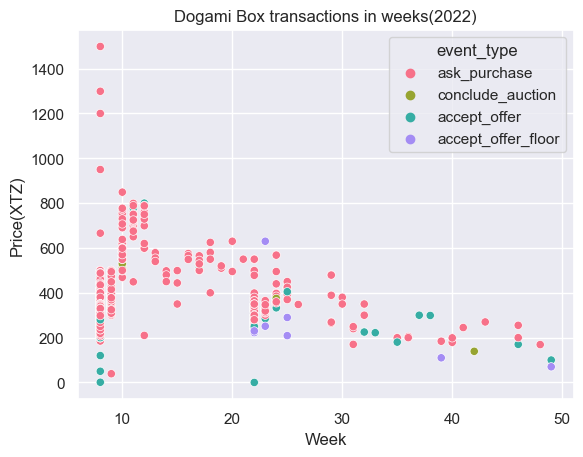

In [101]:
a=sns.scatterplot(box, x='Week', y='price',hue='event_type', palette='husl')
a.set(ylabel= 'Price(XTZ)',title='Dogami Box transactions in weeks(2022)')

" sns.histplot(ax = axes[0], data = transfer['timediff_hours'][transfer['timediff_hours']<=24],bins=12)\nfor i in range(3):\n    axes[i].set(xlabel = 'Duration (hours)')\naxes[0].set_title('In a day')\naxes[1].set_title('In a week')\naxes[2].set_title('Over a week')\nfig.suptitle('How long the holder keep this NFT') "

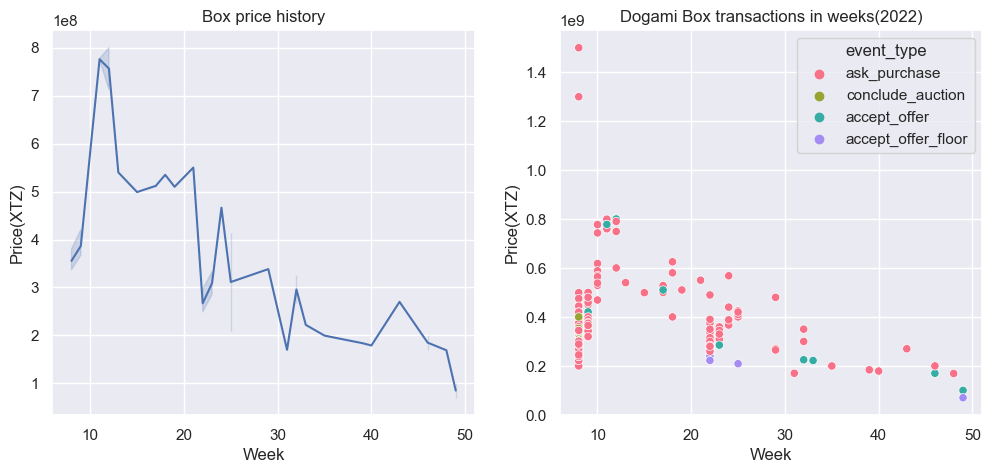

In [30]:
sns.set_theme()
fig,axes = plt.subplots(1, 2, figsize = (12,5))
sns.scatterplot(ax = axes[1], data = box, x='Week', y='price',hue='event_type', palette='husl')
axes[1].set(ylabel= 'Price(XTZ)',title='Dogami Box transactions in weeks(2022)')

sns.lineplot(ax=axes[0], data = group_box, x='Week', y='price')
axes[0].set(ylabel='Price(XTZ)', title= 'Box price history')

""" sns.histplot(ax = axes[0], data = transfer['timediff_hours'][transfer['timediff_hours']<=24],bins=12)
for i in range(3):
    axes[i].set(xlabel = 'Duration (hours)')
axes[0].set_title('In a day')
axes[1].set_title('In a week')
axes[2].set_title('Over a week')
fig.suptitle('How long the holder keep this NFT') """

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Price(XTZ)'),
 Text(0.5, 1.0, 'Dogami Box transactions in months(2022)')]

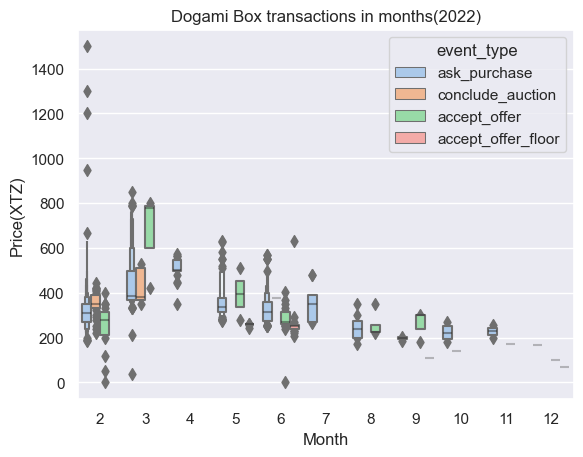

In [98]:
a=sns.boxenplot(box, x='month', y = 'price', hue = 'event_type', palette= 'pastel')
a.set(xlabel= 'Month', ylabel= 'Price(XTZ)', title='Dogami Box transactions in months(2022)')

[Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Trade count for boxes')]

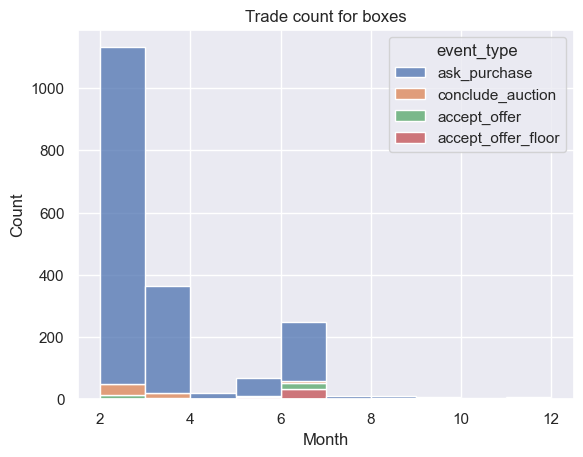

In [115]:
#Count the transfer
a = sns.histplot(box, x='month', hue='event_type', multiple="stack", binwidth= 1)
a.set(xlabel = 'Month', title = 'Trade count for boxes')

In [28]:
group_box = box[['Week','event_type','price']].groupby(by = ['Week', 'event_type']).mean()

In [92]:
group_box.head()

price
Week event_type                  
8    accept_offer      246.133400
     ask_purchase      312.847352
     conclude_auction  350.320000
9    accept_offer      420.690000
     ask_purchase      375.210050

[Text(0, 0.5, 'Price(XTZ)'), Text(0.5, 1.0, 'Box price history')]

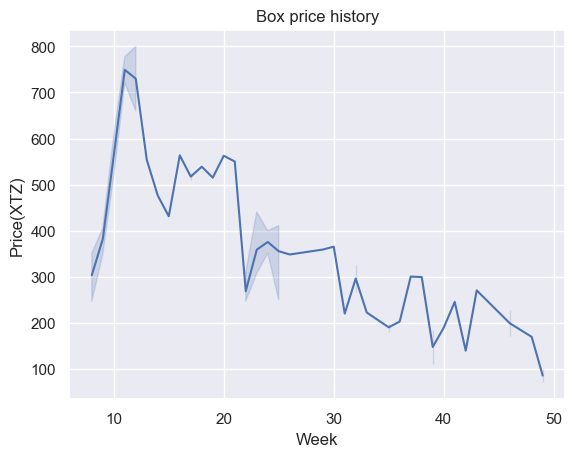

In [166]:
a = sns.lineplot(group_box, x='Week', y='price')
a.set(ylabel='Price(XTZ)', title= 'Box price history')

In [37]:
group_puppies = Ptrade_final[['Week','Rarity tier','price']].groupby(['Week','Rarity tier']).mean()

[Text(0, 0.5, 'Price(XTZ)'), Text(0.5, 1.0, 'Price in All Rarity tiers')]

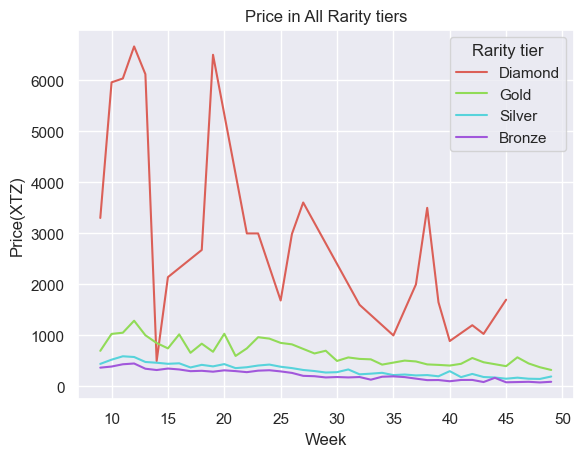

In [40]:
a = sns.lineplot(group_puppies, x='Week', y='price', hue= 'Rarity tier', hue_order= ['Diamond','Gold', 'Silver','Bronze'], palette= 'hls')
a.set(ylabel= 'Price(XTZ)', title = 'Price in All Rarity tiers')

[Text(0.5, 1.0, 'Trade volume by event type')]

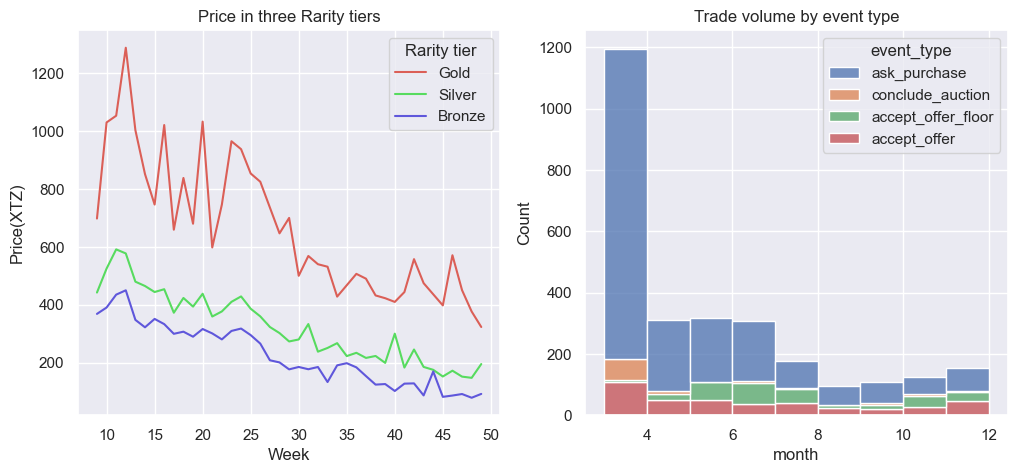

In [51]:
fig1, axes = plt.subplots(1,2, figsize =(12,5))
sns.lineplot(ax=axes[0], data = group_puppies, x='Week', y='price', hue= 'Rarity tier', hue_order= ['Gold', 'Silver','Bronze'], palette= 'hls')
axes[0].set(ylabel= 'Price(XTZ)', title = 'Price in three Rarity tiers')
sns.histplot(ax = axes[1] ,data = Ptrade_final ,x='month',hue='event_type',multiple="stack", binwidth= 1)
axes[1].set(title='Trade volume by event type')  


[Text(0.5, 1.0, 'Trade volume by Rarity tier')]

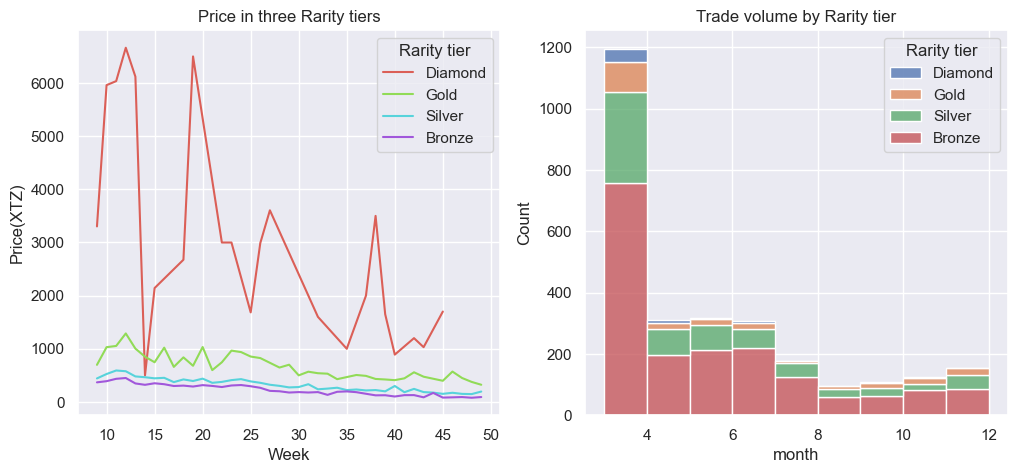

In [53]:
fig1, axes = plt.subplots(1,2, figsize =(12,5))
sns.lineplot(ax=axes[0], data = group_puppies, x='Week', y='price', hue= 'Rarity tier', hue_order= ['Diamond','Gold', 'Silver','Bronze'], palette= 'hls')
axes[0].set(ylabel= 'Price(XTZ)', title = 'Price in three Rarity tiers')
sns.histplot(ax = axes[1] ,data = Ptrade_final ,x='month',hue='Rarity tier',multiple="stack", binwidth= 1, hue_order= ['Diamond','Gold', 'Silver','Bronze'])
axes[1].set(title='Trade volume by Rarity tier')  

[Text(0.5, 1.0, 'Trade volume by event type(limited week)')]

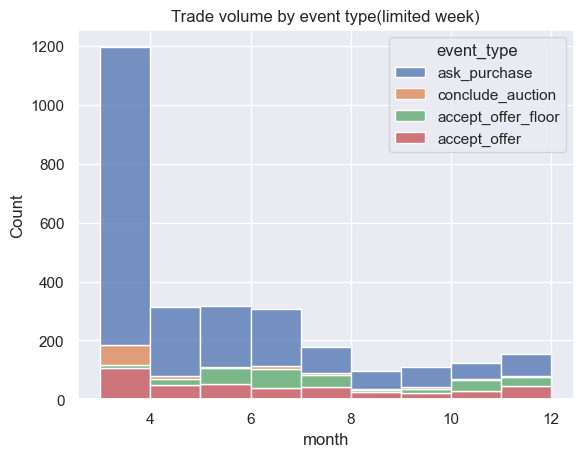

In [45]:
a = sns.histplot(Ptrade_final,x='month',hue='event_type',multiple="stack", binwidth= 1)
a.set(title='Trade volume by event type(limited week)')

#Analysis of the trades of puppies

[Text(0, 0.5, 'Price(XTZ)'), Text(0.5, 1.0, 'Puppies trades by weeks')]

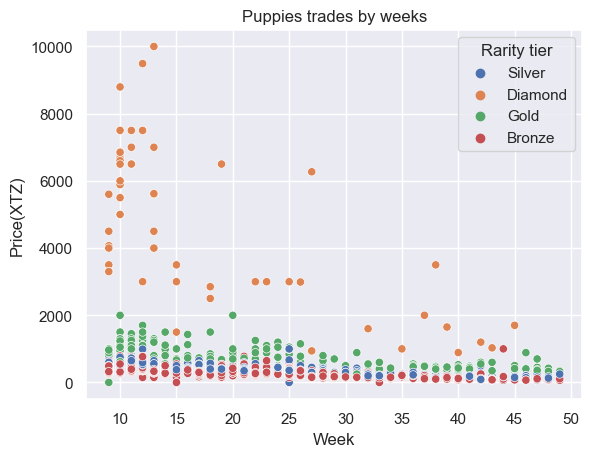

In [135]:
a = sns.scatterplot(Ptrade_final, x='Week', y='price', hue='Rarity tier',)
a.set(ylabel='Price(XTZ)', title='Puppies trades by weeks')

[Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Puppies trade count')]

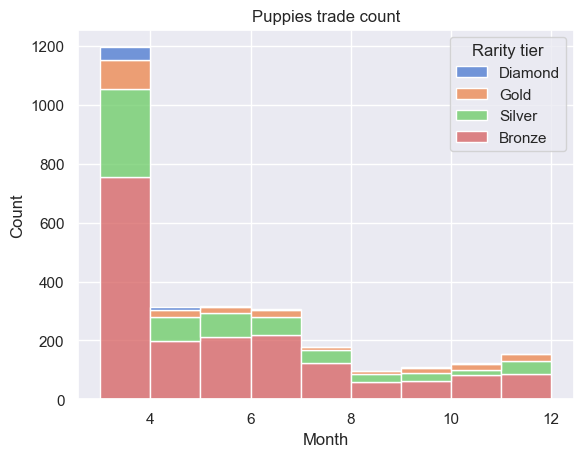

In [138]:
a=sns.histplot(Ptrade_final, x='month', hue='Rarity tier', palette= 'muted', multiple="stack", binwidth= 1, hue_order= ['Diamond','Gold', 'Silver','Bronze'])
a.set(xlabel='Month', title='Puppies trade count')

In [31]:
group_puppies = Ptrade_final[['Week','Rarity tier','price']].groupby(['Week','Rarity tier']).mean()

In [139]:
Ptrade_final.columns

Index([                     0,                   'id',           'event_type',
                      'price',            'timestamp',             'token_pk',
          'recipient_address',      'creator_address',       'token.token_id',
                     'ts_new',                 'Week',                'month',
       'last_metadata_update',             'token_id',             'Birthday',
                'Rarity tier',         'Rarity score'],
      dtype='object')

In [143]:
group_puppies.head()

price
Week Rarity tier             
9    Bronze        368.288889
     Diamond      3302.000000
     Gold          697.861056
     Silver        442.044783
10   Bronze        390.300028

[Text(0, 0.5, 'Price(XTZ)'), Text(0.5, 1.0, 'Price in All Rarity tiers')]

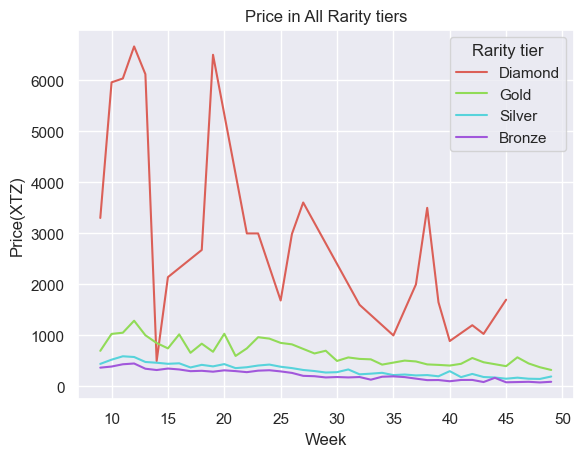

In [155]:
a = sns.lineplot(group_puppies, x='Week', y='price', hue= 'Rarity tier', hue_order= ['Diamond','Gold', 'Silver','Bronze'], palette= 'hls')
a.set(ylabel= 'Price(XTZ)', title = 'Price in All Rarity tiers')


[Text(0, 0.5, 'Price(XTZ)'), Text(0.5, 1.0, 'Price in three Rarity tiers')]

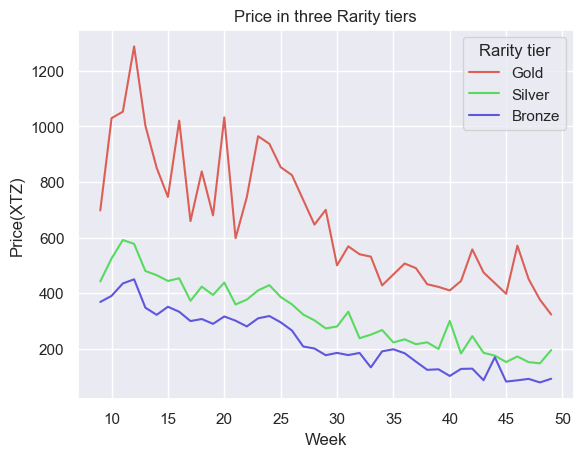

In [154]:
a = sns.lineplot(group_puppies, x='Week', y='price', hue= 'Rarity tier', hue_order= ['Gold', 'Silver','Bronze'], palette= 'hls')
a.set(ylabel= 'Price(XTZ)', title = 'Price in three Rarity tiers')


<AxesSubplot:xlabel='month', ylabel='price'>

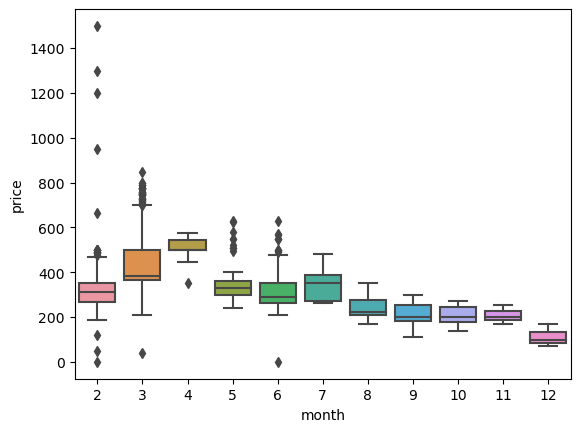

In [44]:
sns.boxplot(box, x='month', y='price')

[Text(0.5, 1.0, 'Transaction of Bronze dogs')]

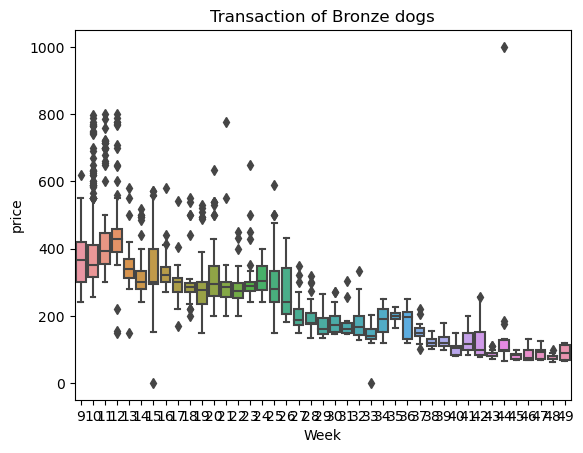

In [45]:
a = sns.boxplot(Ptrade_final[Ptrade_final['Rarity tier']=='Bronze'], x='Week', y='price')
#sns.set(rc={'figure.figsize':(8,6)})
a.set(title='Transaction of Bronze dogs')

[Text(0.5, 1.0, 'Transaction of Gold dogs')]

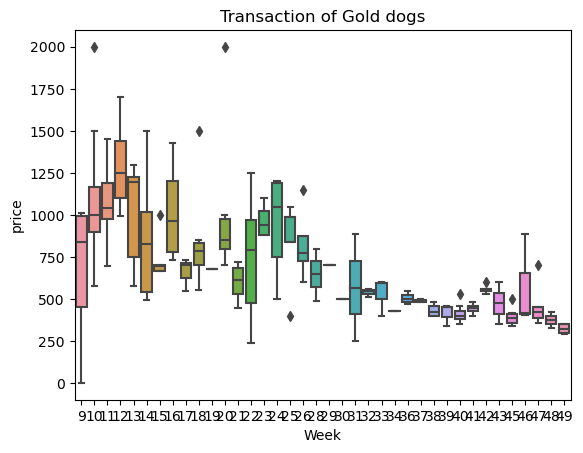

In [46]:
a = sns.boxplot(Ptrade_final[Ptrade_final['Rarity tier']=='Gold'], x='Week', y='price')
a.set(title='Transaction of Gold dogs')

[(0.0, 500.0)]

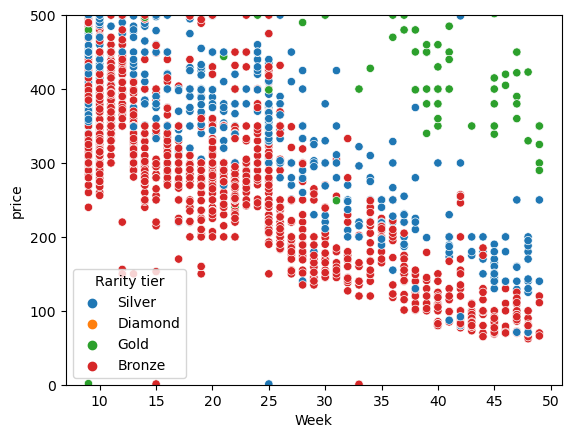

In [47]:
a = sns.scatterplot(Ptrade_final, x='Week', y='price', hue='Rarity tier')
a.set(ylim= (0,500))

In [69]:
Counter(Ptrade['Week']).most_common(5)

[(8, 922), (10, 582), (9, 554), (22, 230), (11, 204)]

In [164]:
Ptrade_final.head()

,0,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id,ts_new,Week,month,last_metadata_update,token_id,Birthday,Rarity tier,Rarity score
0,NaN,31553847.0,ask_purchase,250.0,2022-08-11T09:04:29+00:00,23684.0,tz2XYjjBvQmHNankGRSdNsKdFbQ1kEjQJrrb,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,48,2022-08-11 09:04:29,32,8,2022-07-06T17:32:14,48,2022-03-06,Silver,4751.24
1,NaN,31600098.0,ask_purchase,270.0,2022-08-12T16:06:44+00:00,23535.0,tz1RhD4eJNjD52VYfe94JNVhNT6yTXFZ1PLe,tz1UUjzFkHu5cwabpwtHkYSjH4XfMYC9YJJm,49,2022-08-12 16:06:44,32,8,2022-07-06T17:34:44,49,2022-03-06,Silver,6364.02
6,NaN,26417463.0,ask_purchase,1499.0,2022-04-15T04:47:29+00:00,10306.0,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,3,2022-04-15 04:47:29,15,4,2022-07-06T18:49:29,3,2022-04-15,Diamond,9115.57
16,NaN,24805913.0,ask_purchase,6750.0,2022-03-13T08:33:24+00:00,18697.0,tz1Vw1tsHuRYaCuk341eUzPfK7oj6FFcs6c9,tz1e3JMZRrfofz6LZc4wydMTHSBiL8rvCEnd,42,2022-03-13 08:33:24,10,3,2022-07-06T17:24:14,42,2022-03-05,Diamond,8981.67
17,NaN,3143609.0,conclude_auction,970.0,2022-03-06T09:50:24+00:00,16036.0,tz1hMuq6yxEzAeieUjBqXFCFTaLZf1eh3QkX,tz2MuvEK35bkmNuZVovmB4LY5L3963SGfY8b,28,2022-03-06 09:50:24,9,3,2022-07-06T16:50:59,28,2022-03-04,Gold,8152.17


Stastical models and explaination

In [ ]:
#Conduct a simple linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [24]:
lm = LinearRegression().fit(Ptrade_final[['Week', 'Rarity score']],Ptrade_final['price'])

In [32]:
print(f'The intercept is {round(lm.intercept_*100)/100}' )
print(f'The coefficients of week is {round(lm.coef_[0]*100)/100} and Rarity score is {round(lm.coef_[1]*100)/100} ')
print('the R square is {}'.format(lm.score(Ptrade_final[['Week', 'Rarity score']], Ptrade_final['price'] )))

The intercept is -382.09
The coefficients of week is -12.77 and Rarity score is 0.23 
the R square is 0.27716960503991717


In [33]:
x= Ptrade_final[['Week', 'Rarity score']]
x=sm.add_constant(x) #Add constant variable

In [35]:
y = Ptrade_final['price']

In [36]:
model = sm.OLS(y, x)

In [37]:
results = model.fit()

In [38]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     535.1
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          1.93e-197
Time:                        10:37:05   Log-Likelihood:                -22122.
No. Observations:                2794   AIC:                         4.425e+04
Df Residuals:                    2791   BIC:                         4.427e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -382.0939     46.332     -8.247   

Unused code

In [51]:
Ptrade.drop(columns=0, inplace=True)

In [52]:
query = """query MyQuery {
  event(
    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_eq: "ask_purchase"}, token: {token_id: {_in: ["3","4"]}}}
  ) {
    id
    event_type
    price
    timestamp
    token_pk
    token {
      token_id
    }
    recipient_address
    creator_address
  }
}

"""
url = "https://data.objkt.com/v2/graphql"

In [53]:
r = requests.post(url, json={'query': query})
print(r.status_code)
json_data = json.loads(r.text)
type(json_data)
df = pd.json_normalize(json_data, record_path=['data','event'])
df.head()

200


,id,event_type,price,timestamp,token_pk,recipient_address,creator_address,token.token_id
0,22437837,ask_purchase,666000000,2022-02-22T22:27:50+00:00,10306,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,tz1TVJBFaUg2Ki6dSJ5JqMQAAE4XVv1iQqvT,3
1,22490512,ask_purchase,1200000000,2022-02-23T01:41:00+00:00,10691,tz2KJ784BBjQbxiSz6j8xcaR58PdSQZD15Gb,tz1XZ8qGWQ4MukcDsgrNzUZ9VubmCRZaYGMX,4
2,26417463,ask_purchase,1499000000,2022-04-15T04:47:29+00:00,10306,tz1aqBDnWjheYsbNVa27HCS4S7CmhSszHLDm,tz1YYX8bVLzfDYmhpUZ6oiZjqjw8aN23qd5N,3


In [54]:
for i in [2,3,4,5]:
    print(i in [2,3,4])

True
True
True
False


In [55]:
#df.to_excel("df.xlsx", sheet_name='ask purchase')

In [56]:
#df["timestamp"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S+00:00").isoformat())[1]

'2022-02-23T01:41:00'

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3 non-null      int64 
 1   event_type         3 non-null      object
 2   price              3 non-null      int64 
 3   timestamp          3 non-null      object
 4   token_pk           3 non-null      int64 
 5   recipient_address  3 non-null      object
 6   creator_address    3 non-null      object
 7   token.token_id     3 non-null      object
dtypes: int64(3), object(5)
memory usage: 320.0+ bytes


In [58]:
query

'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_eq: "ask_purchase"}, token: {token_id: {_in: ["3","4"]}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'

In [59]:
query = 'query MyQuery {\n  event(\n    where: {fa: {contract: {_eq: "KT1NVvPsNDChrLRH5K2cy6Sc9r1uuUwdiZQd"}}, event_type: {_in: ["ask_purchase","conclude_auction", "accept_offer","accept_offer_floor"]}, token: {token_id: {_in: '+'['+','.join(f'"{item}"' for item in puppies['token_id'][:5]) + ']'+'}}}\n  ) {\n    id\n    event_type\n    price\n    timestamp\n    token_pk\n    token {\n      token_id\n    }\n    recipient_address\n    creator_address\n  }\n}\n\n'
